# Analysis

Analysis file for ABM assessment 1

In [1]:
# load libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# load results

path = os.path.join('models', 'outputs')

# metab-vision-pop variant
s2_mvp = pd.read_csv(
    os.path.join(path, 'Sugarscape 2 Constant Growback_edit metab_vision_pop-table.csv'),
    skiprows = 6
)
s3_mvp = pd.read_csv(
    os.path.join(path, 'Sugarscape 3 Wealth Distribution_edit metab-vision-pop-table.csv'),
    skiprows = 6
)

# sugar-endowment variable
s2_endow = pd.read_csv(
    os.path.join(path, 'Sugarscape 2 Constant Growback_edit sugar_endowment-table.csv'),
    skiprows = 6
)
s3_endow = pd.read_csv(
    os.path.join(path, 'Sugarscape 3 Wealth Distribution_edit sugar-endowment-table.csv'),
    skiprows = 6
)


In [3]:
# filter values with endowment errors
s2_endow = s2_endow[s2_endow['endowment-error'] != 'true'].copy().reset_index()
s3_endow = s3_endow[s3_endow['endowment-error'] != 'true'].copy().reset_index()

In [4]:
s2_endow

,index,[run number],minimum-sugar-endowment,maximum-sugar-endowment,[step],count turtles,survival-rate,last-death,gini-index,mean [vision] of turtles,mean [metabolism] of turtles,endowment-error
0,16,21,5,30,192,398,0.442222,90,0.342962,3.6180904522613067,1.4824120603015076,0
1,17,22,10,30,199,382,0.424444,97,0.329695,3.725130890052356,1.4607329842931938,0
2,23,1,5,10,149,422,0.468889,47,0.358454,3.646919431279621,1.4691943127962086,0
3,24,12,10,20,153,416,0.462222,51,0.350594,3.59375,1.4903846153846154,0
4,25,13,15,20,166,411,0.456667,64,0.349201,3.708029197080292,1.4793187347931873,0
...,...,...,...,...,...,...,...,...,...,...,...,...
370,495,494,20,100,520,390,0.433333,418,0.317834,3.5871794871794873,1.4230769230769231,0
371,496,497,35,100,336,402,0.446667,234,0.309931,3.6641791044776117,1.4601990049751243,0
372,497,499,45,100,302,399,0.443333,200,0.297535,3.6591478696741855,1.4761904761904763,0
373,498,498,40,100,349,405,0.450000,247,0.318095,3.5580246913580247,1.4691358024691359,0


## Analysis on the impact of factors on survival rate and gini index

First, we will look at each model separately. Consider which factors do influence the survival rate and the Gini Index (inequality index)



In [5]:
# extract required columns
columns = ['max-vision', 'max-metabolism', 'initial-population', 'count turtles', 'survival-rate', 'gini-index']

s2_mvp_plot = s2_mvp[columns].copy()
s3_mvp_plot = s3_mvp[columns].copy()

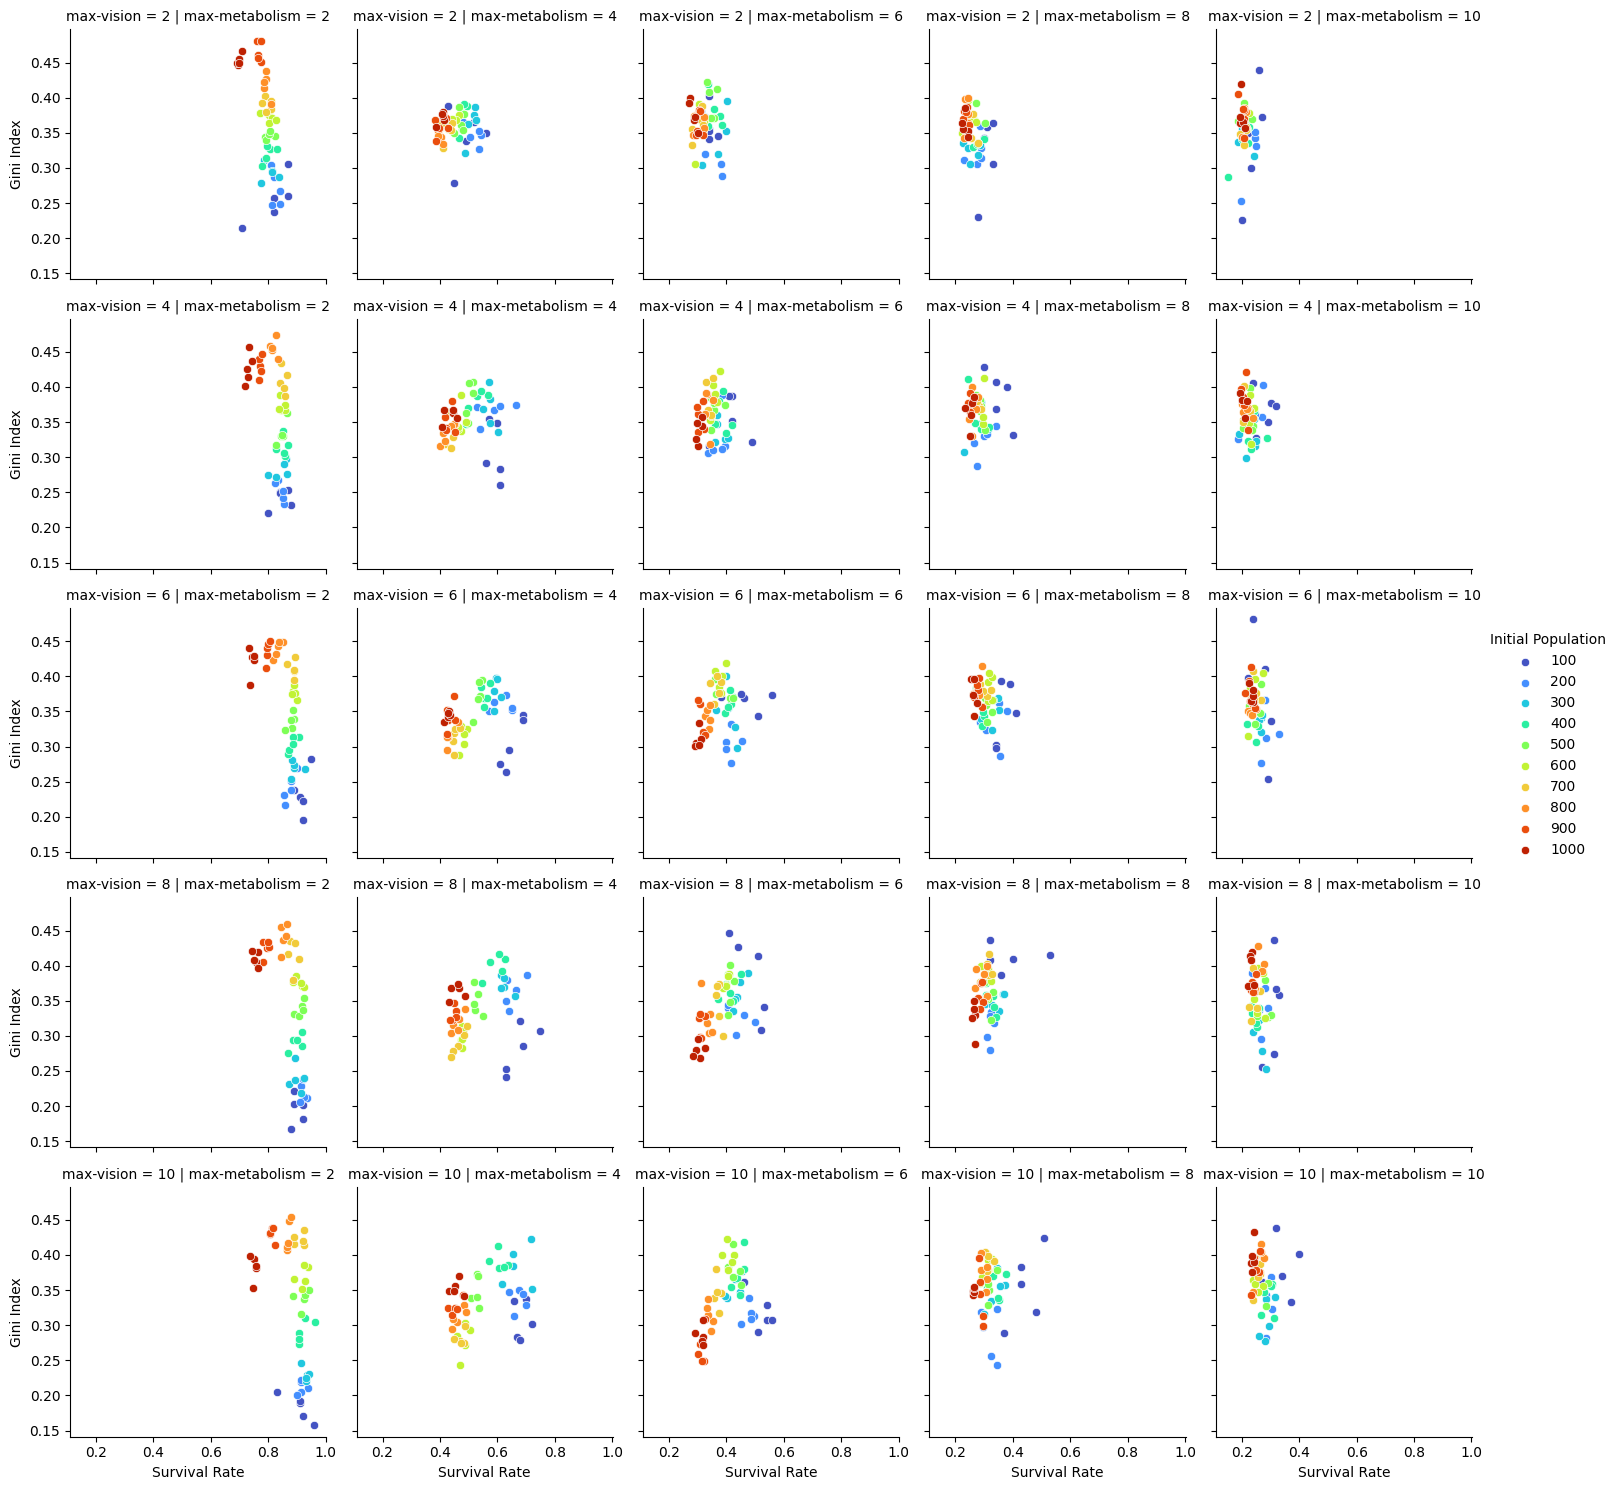

In [59]:
# create plot for s2

# init grid
s2_plot = sns.FacetGrid(
    s2_mvp_plot,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population',
    palette = 'turbo'
)

# create scatter plot
s2_plot.map(
    sns.scatterplot,
    'survival-rate',
    'gini-index'    
)

# add legend
s2_plot.add_legend(title = 'Initial Population')

# set labels
s2_plot.set_xlabels('Survival Rate')
s2_plot.set_ylabels('Gini Index')

# show plot
plt.savefig('image/s2_mvp_gini_survival.png', bbox_inches = 'tight')


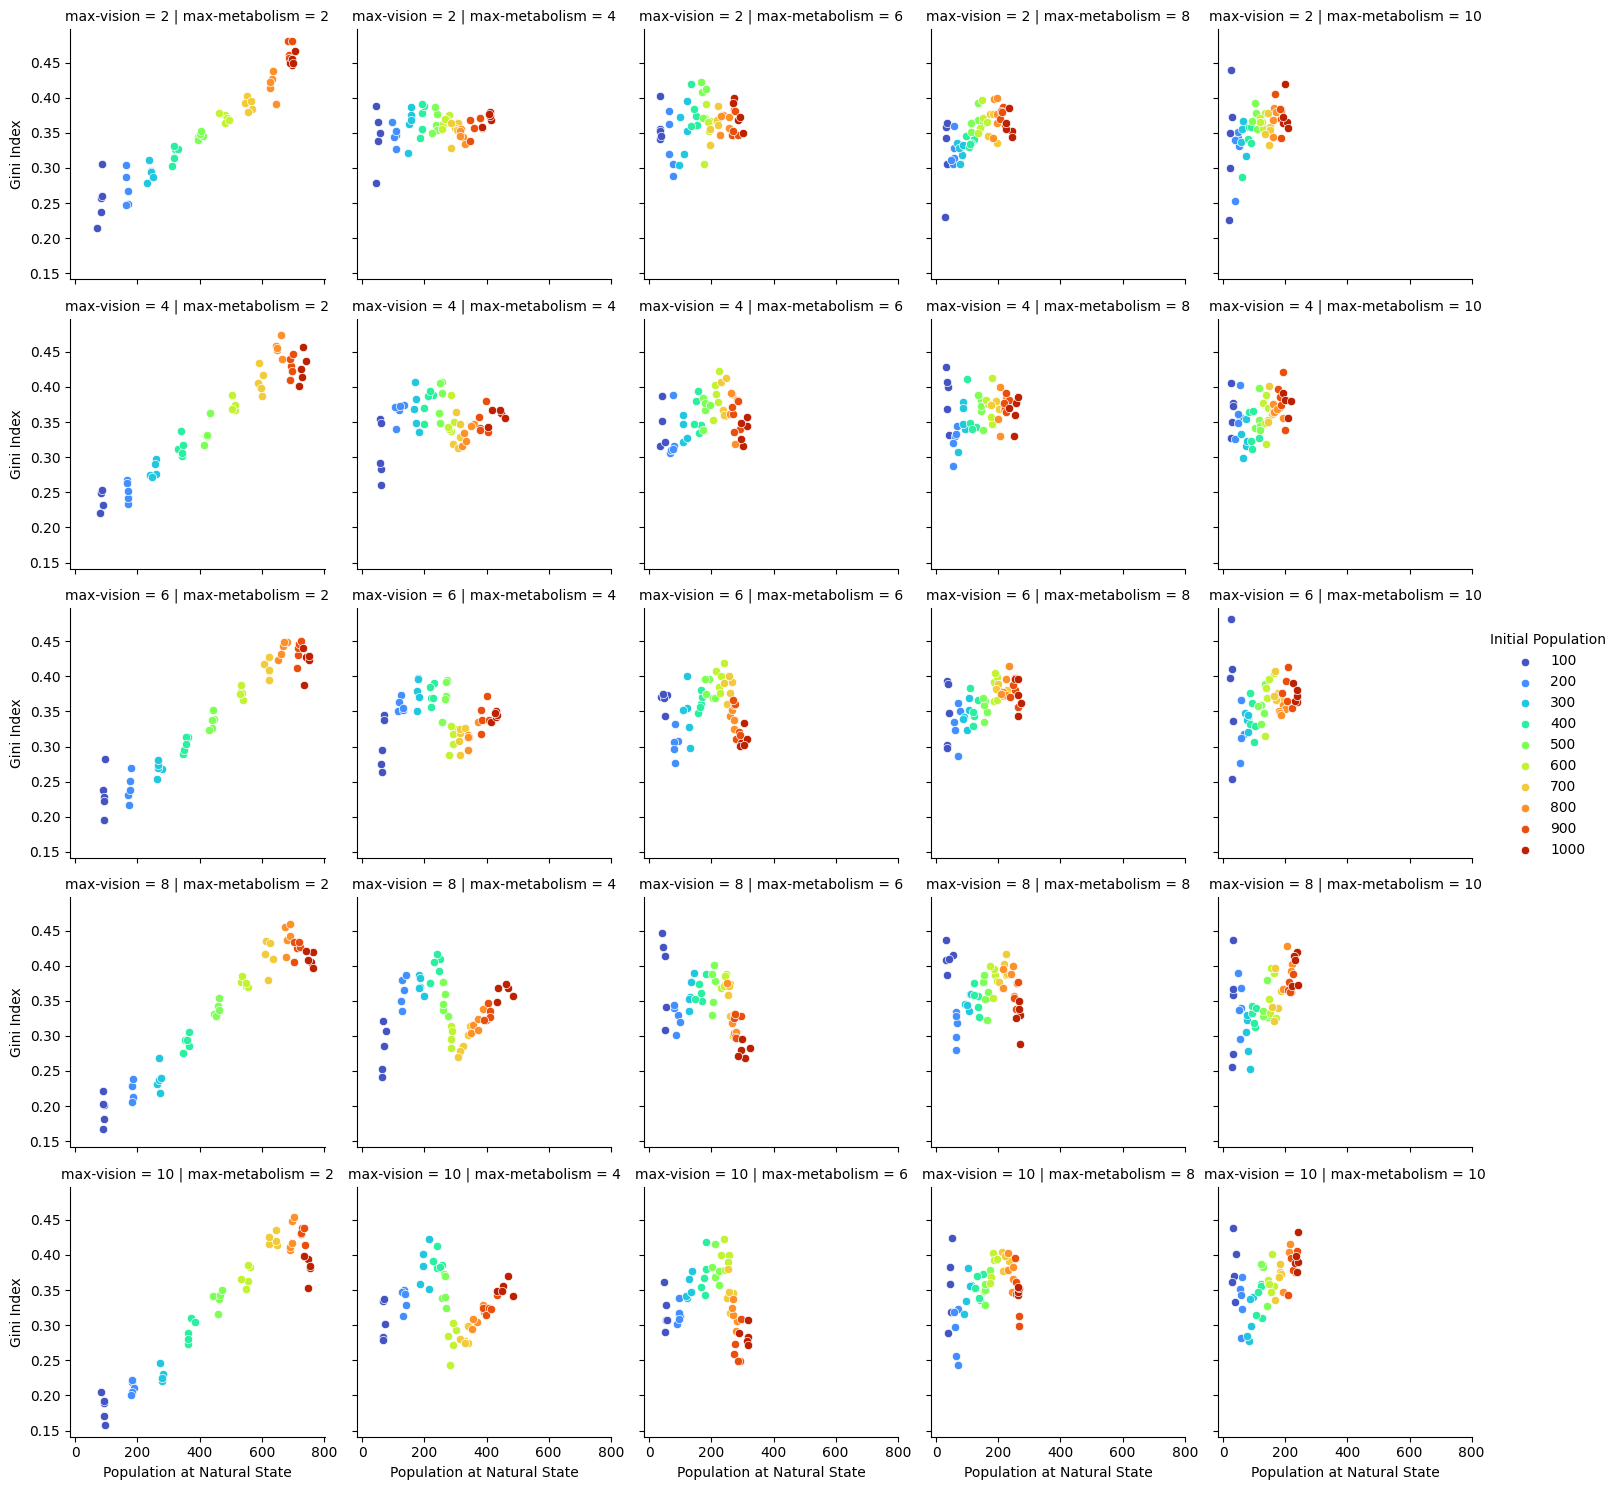

In [58]:
# create plot for s2 for Gini Index

# init grid
s2_plot = sns.FacetGrid(
    s2_mvp_plot,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population',
    palette = 'turbo'
)

# create scatter plot
s2_plot.map(
    sns.scatterplot,
    'count turtles',
    'gini-index'
)

# add legend
s2_plot.add_legend(title = 'Initial Population')

# set labels
s2_plot.set_xlabels('Population at Natural State')
s2_plot.set_ylabels('Gini Index')

# show plot
plt.savefig('image/s2_mvp_gini.png', bbox_inches = 'tight')


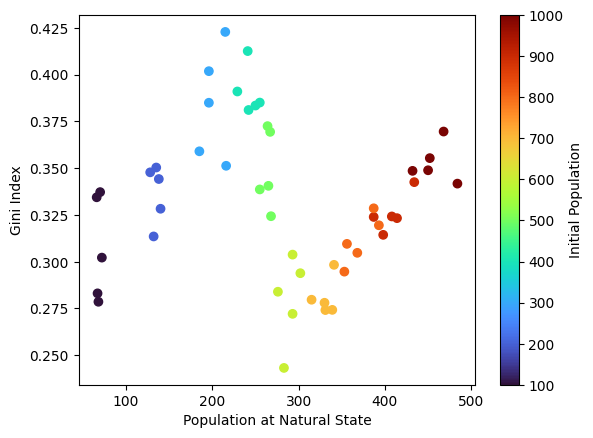

In [56]:
# create figure for one

s2_mvp_filter = s2_mvp_plot[(s2_mvp_plot['max-vision'] == 10) & (s2_mvp_plot['max-metabolism'] == 4)].copy()

plt.scatter(
    x = s2_mvp_filter['count turtles'],
    y = s2_mvp_filter['gini-index'],
    c = s2_mvp_filter['initial-population'],
    cmap = 'turbo'
)

# set axis labels
plt.xlabel('Population at Natural State')
plt.ylabel('Gini Index')

plt.colorbar(
    label = 'Initial Population'
)

# show plot
plt.savefig('image/s2_mvp_gini_filtered.png', bbox_inches = 'tight')


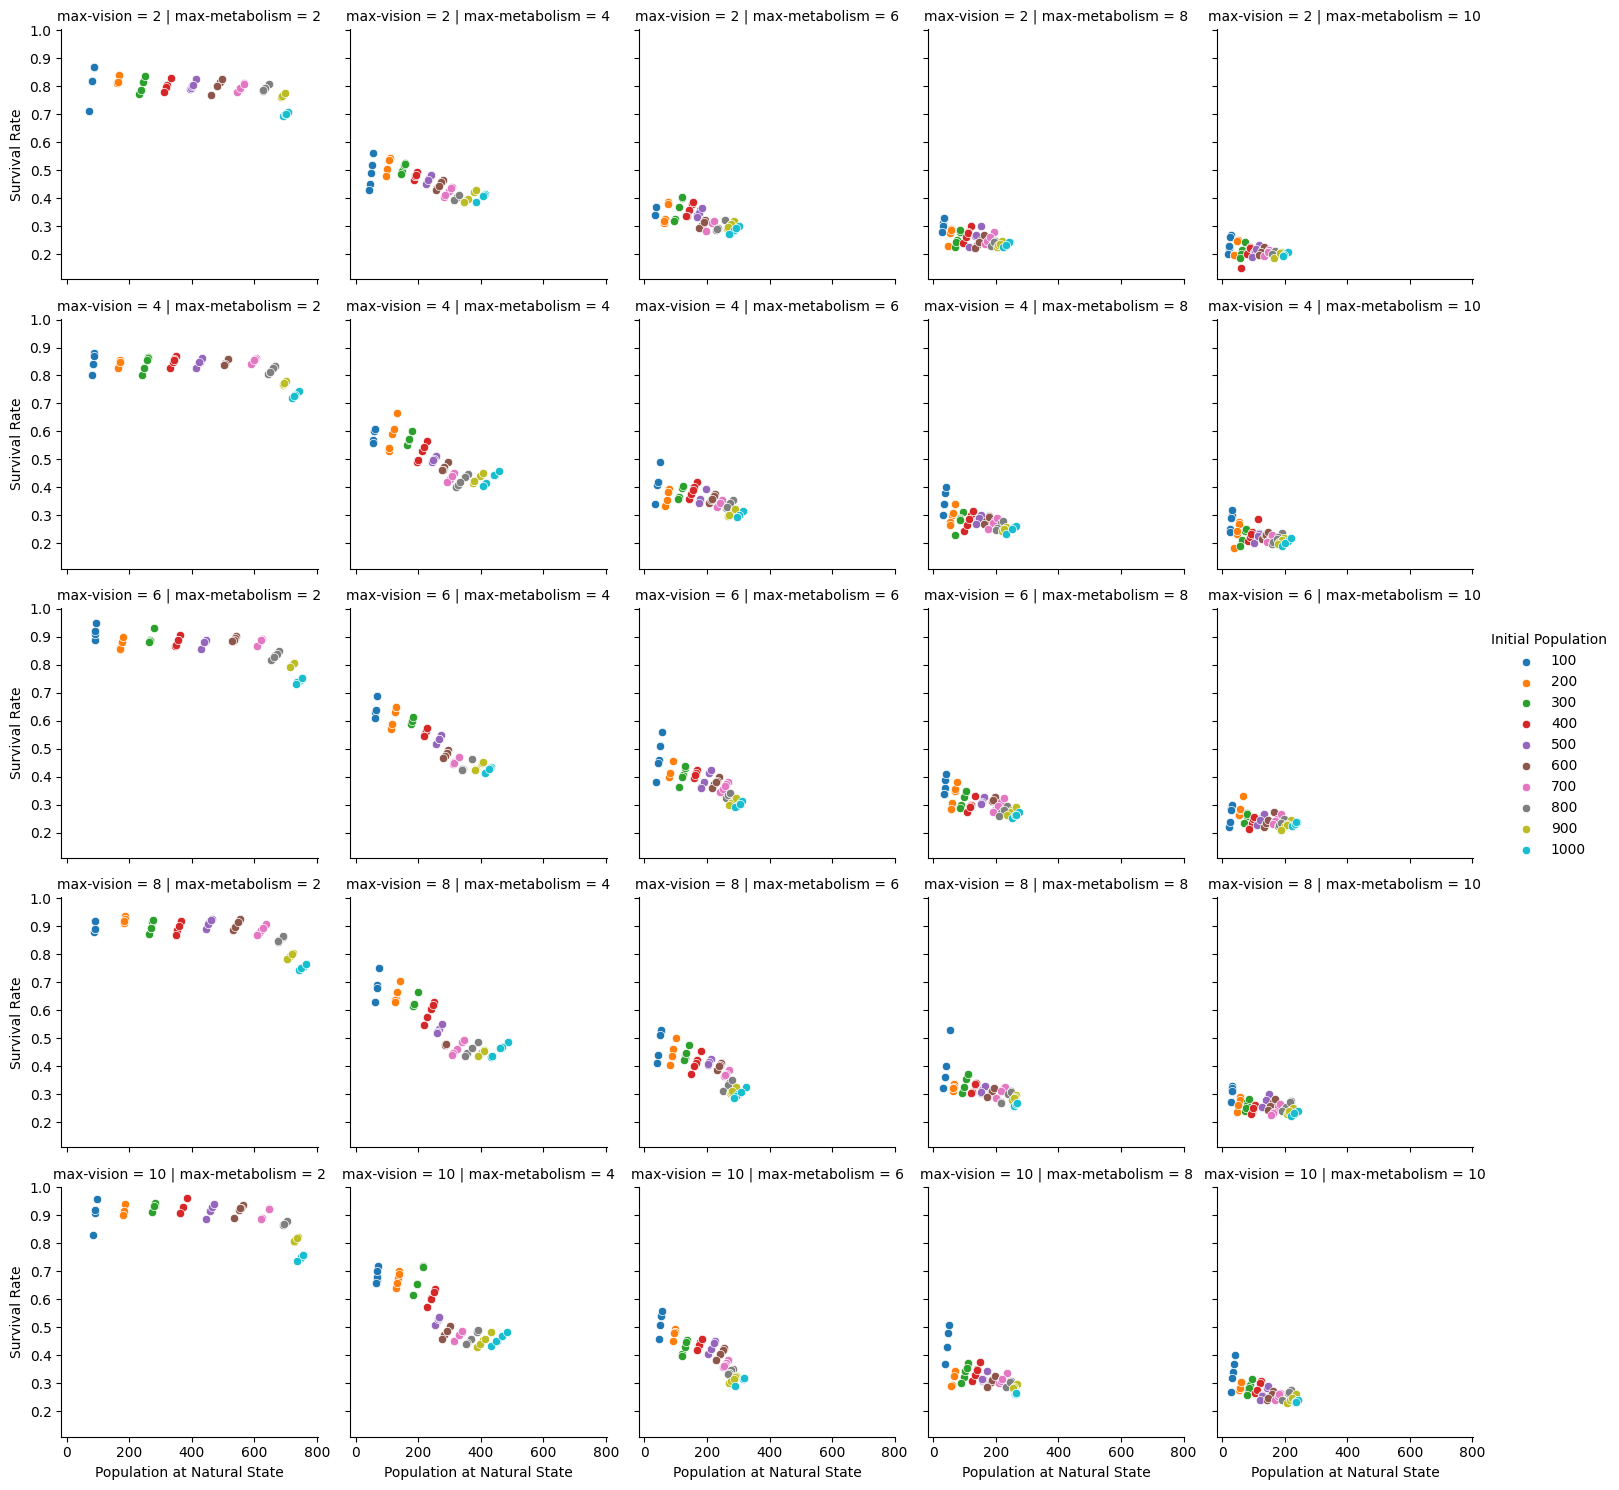

In [8]:
# create plot for s2 for survival rate

# init grid
s2_plot = sns.FacetGrid(
    s2_mvp_plot,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population'
)

# create scatter plot
s2_plot.map(
    sns.scatterplot,
    'count turtles',
    'survival-rate'    
)

# add legend
s2_plot.add_legend(title = 'Initial Population')

# set labels
s2_plot.set_xlabels('Population at Natural State')
s2_plot.set_ylabels('Survival Rate')


# show plot
plt.savefig('image/s2_mvp_survival.png', bbox_inches = 'tight')


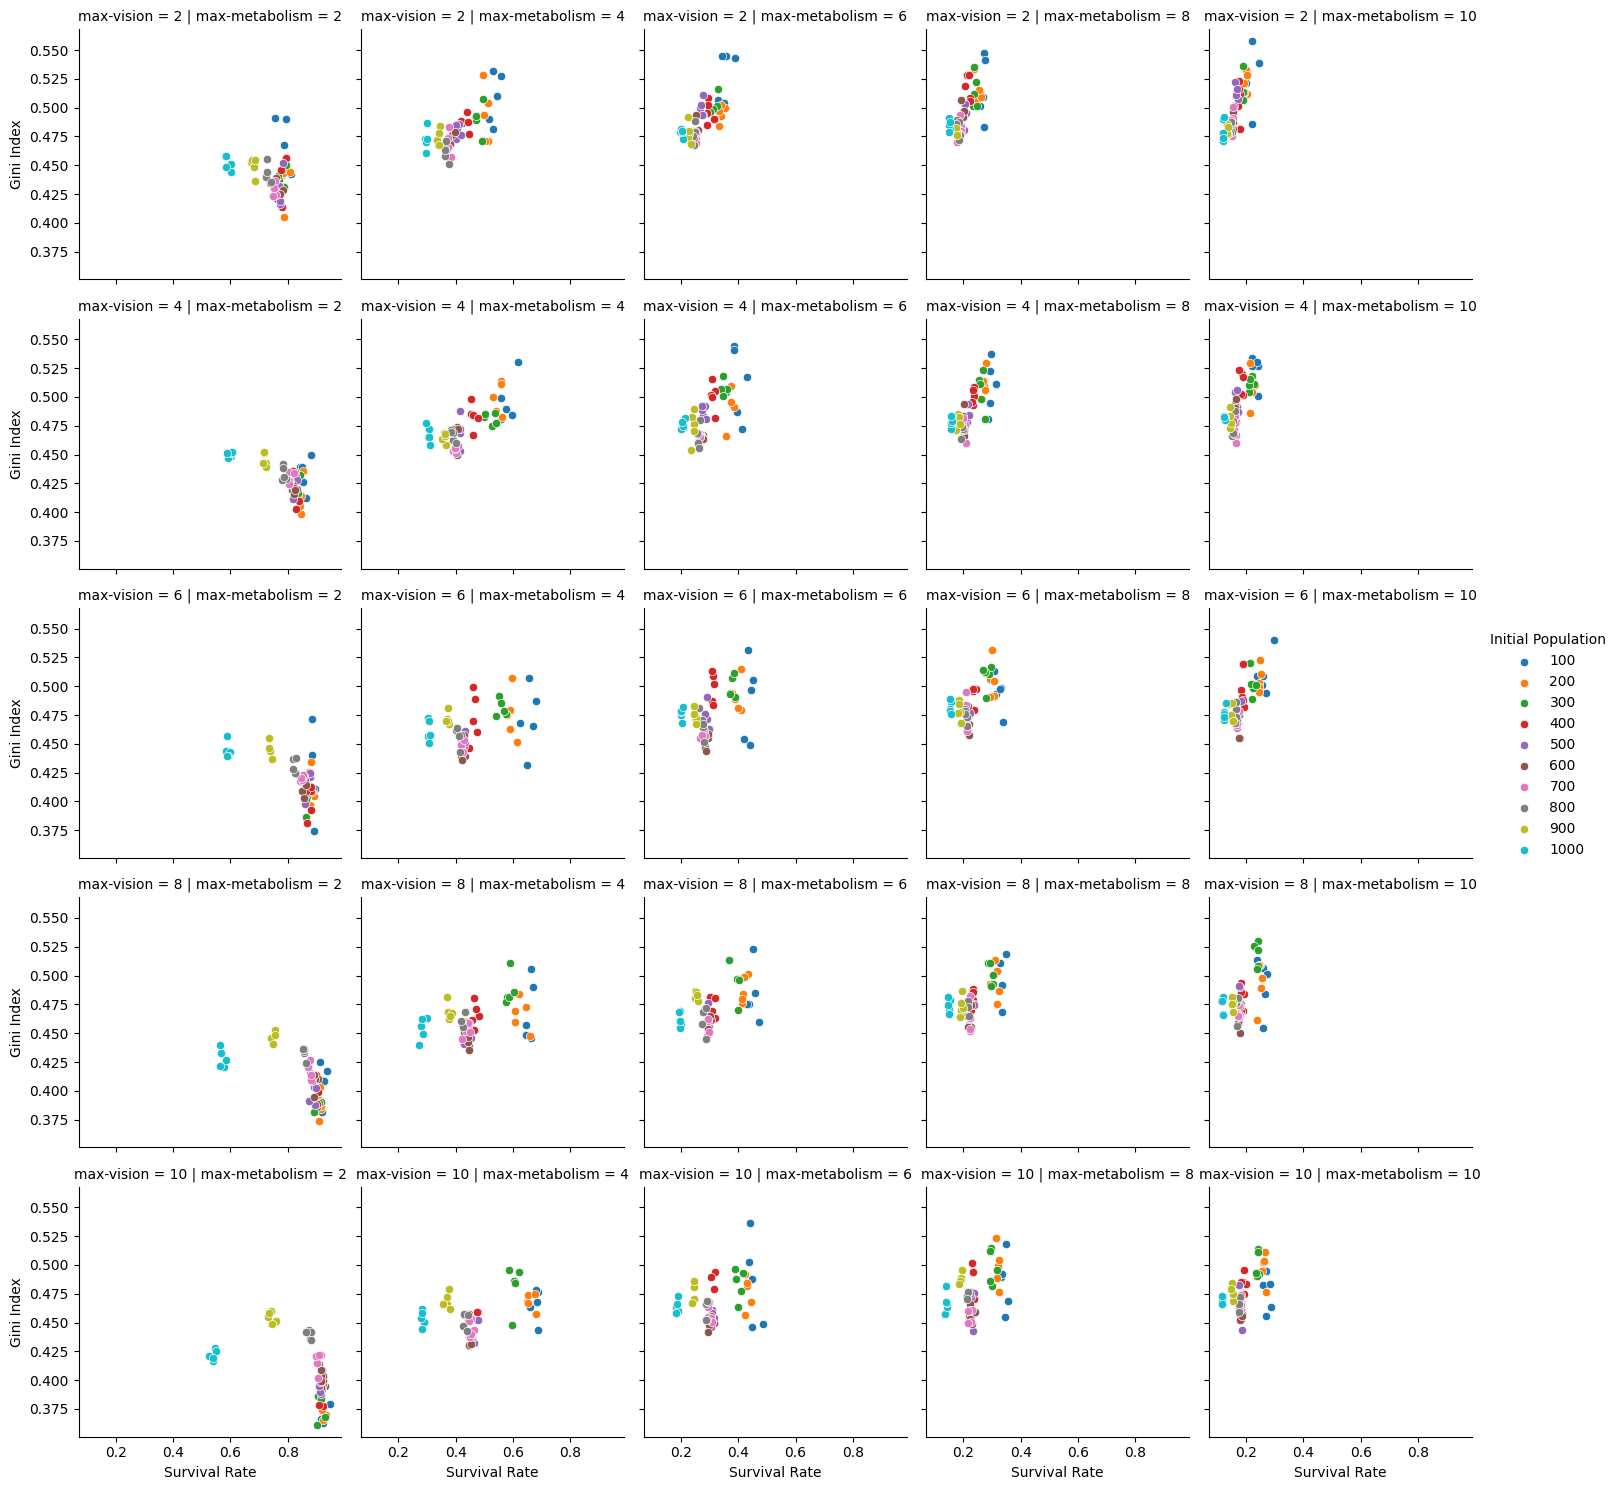

In [9]:
# create plot for s3

# init grid
s3_plot = sns.FacetGrid(
    s3_mvp_plot,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population'
)

# create scatter plot
s3_plot.map(
    sns.scatterplot,
    'survival-rate',
    'gini-index'    
)

# add legend
s3_plot.add_legend(title = 'Initial Population')

# set labels
s3_plot.set_xlabels('Survival Rate')
s3_plot.set_ylabels('Gini Index')

# show plot
plt.savefig('image/s3_mvp_gini_survival.png', bbox_inches = 'tight')


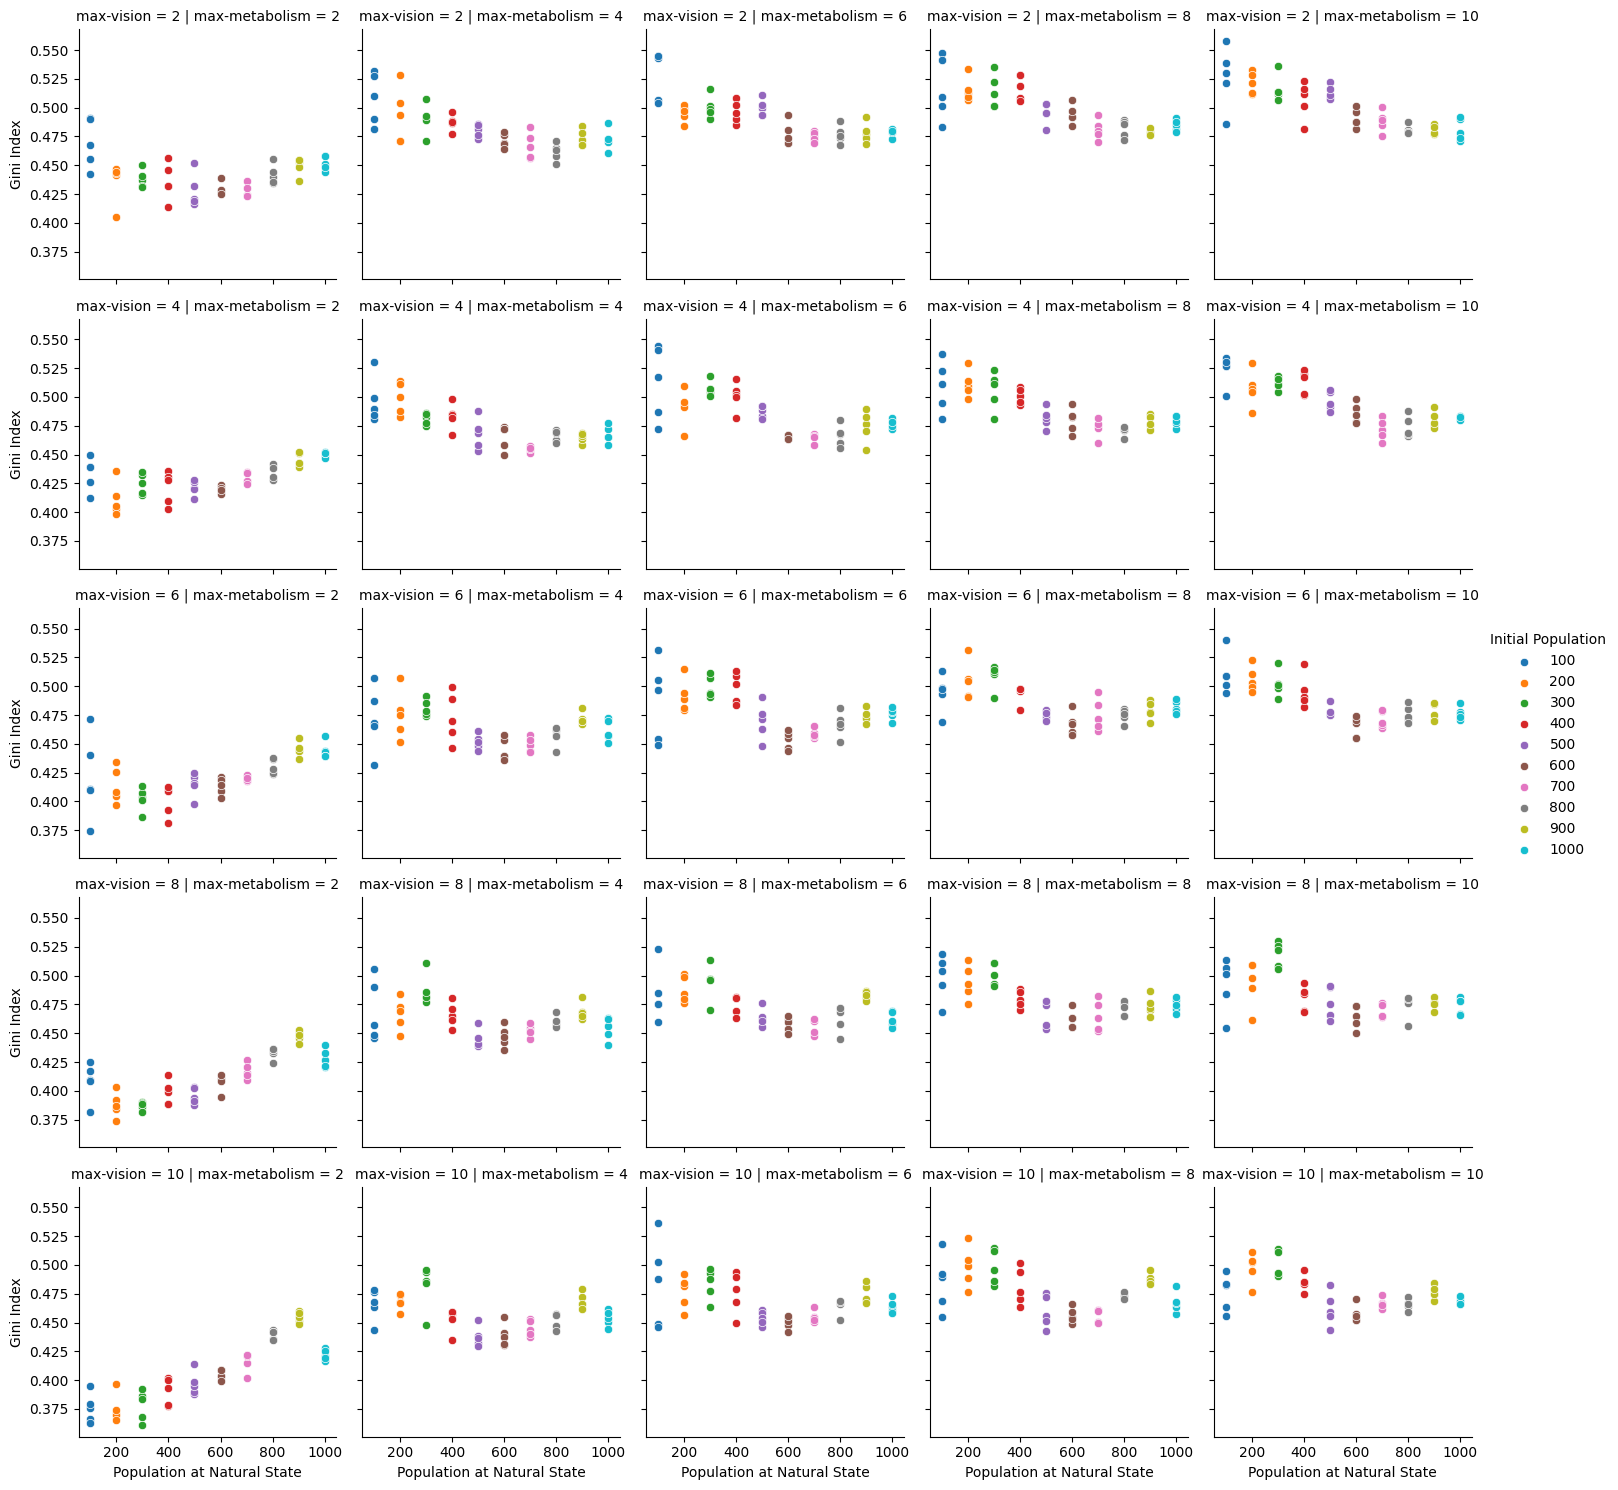

In [10]:
# create plot for s3 for Gini Index

# init grid
s3_plot = sns.FacetGrid(
    s3_mvp_plot,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population'
)

# create scatter plot
s3_plot.map(
    sns.scatterplot,
    'count turtles',
    'gini-index'    
)

# add legend
s3_plot.add_legend(title = 'Initial Population')

# set labels
s3_plot.set_xlabels('Population at Natural State')
s3_plot.set_ylabels('Gini Index')

# show plot
plt.savefig('image/s3_mvp_gini.png', bbox_inches = 'tight')


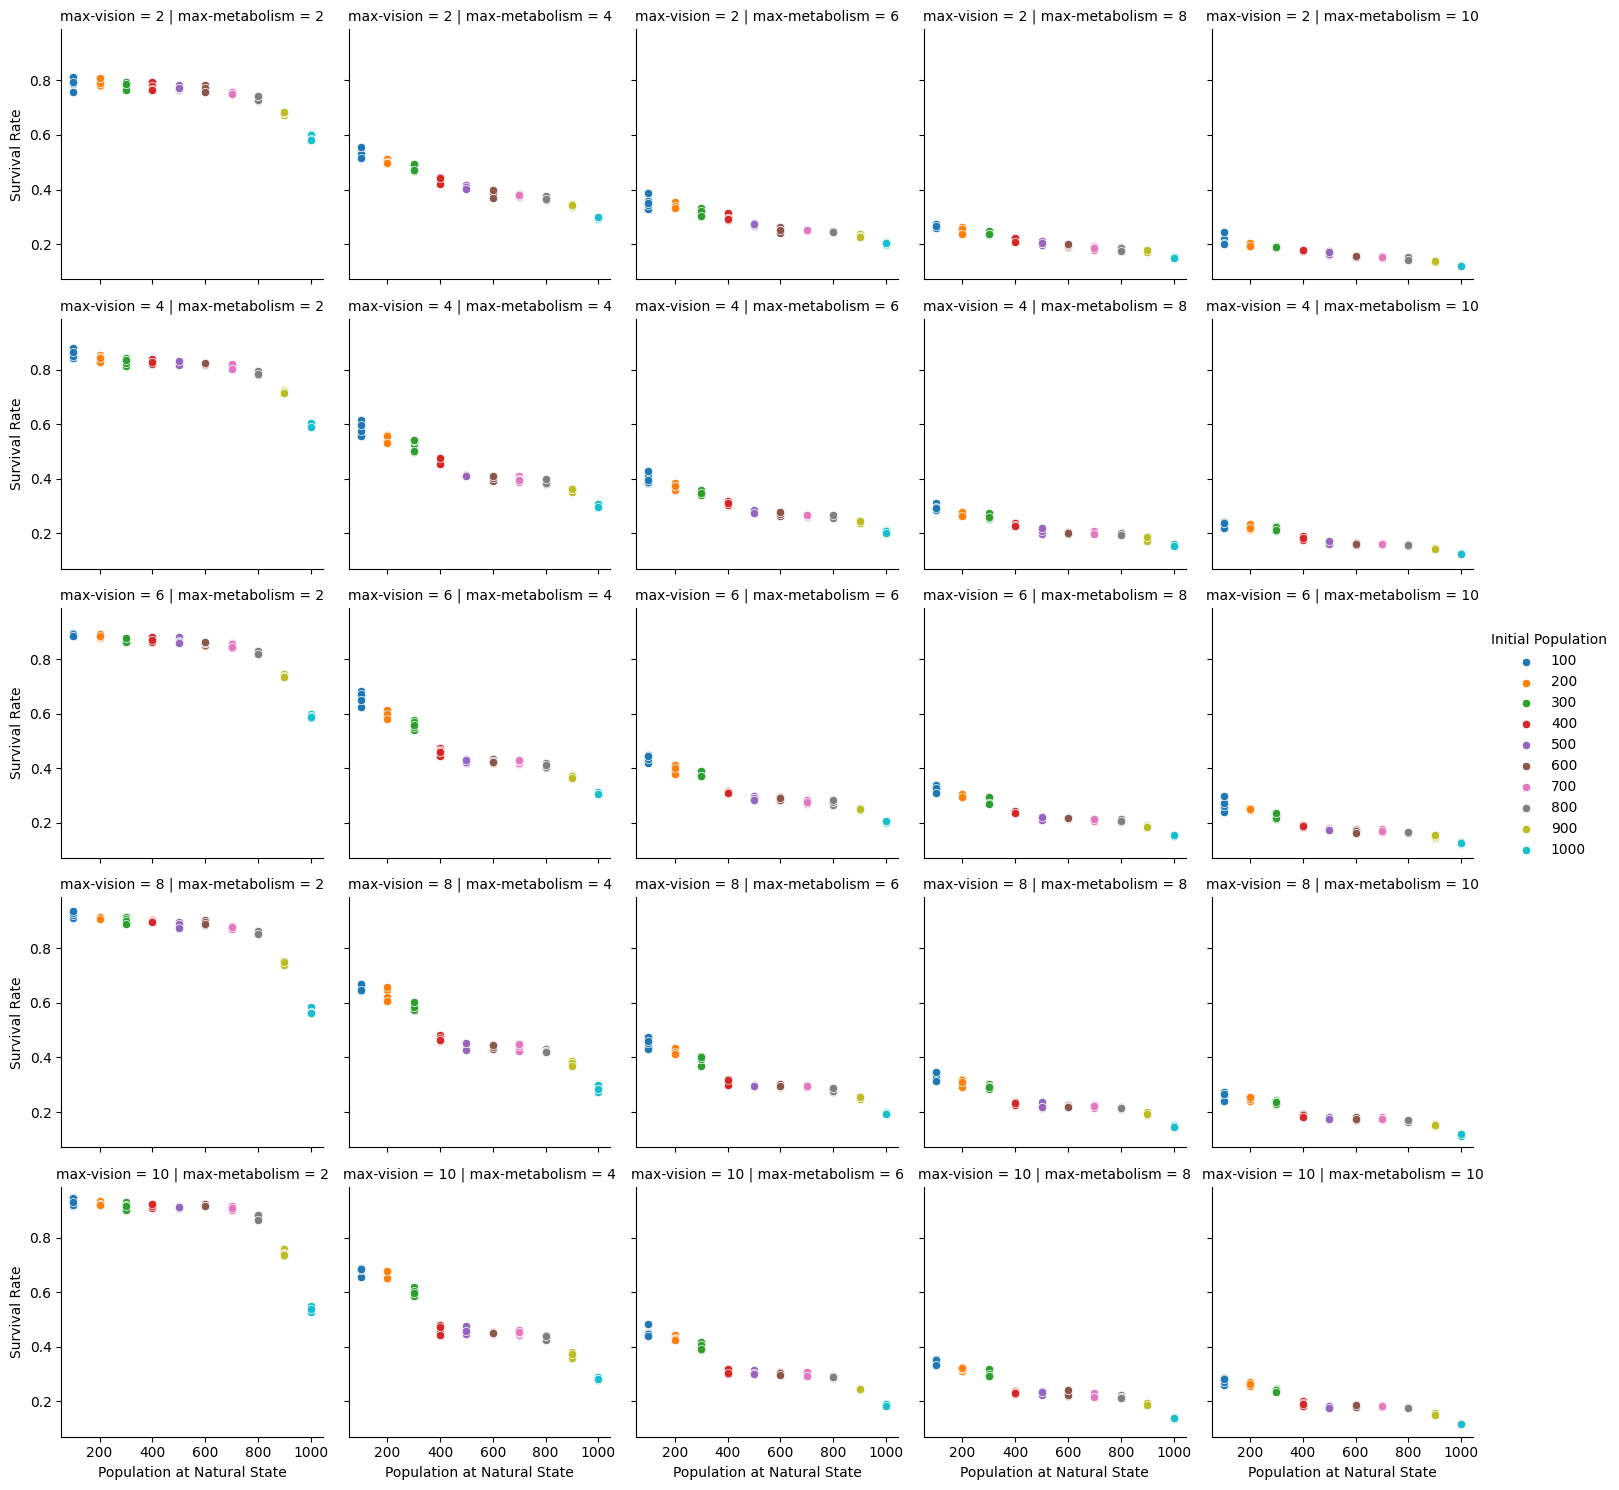

In [11]:
# create plot for s3 for survival rate

# init grid
s3_plot = sns.FacetGrid(
    s3_mvp_plot,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population'
)

# create scatter plot
s3_plot.map(
    sns.scatterplot,
    'count turtles',
    'survival-rate'    
)

# add legend
s3_plot.add_legend(title = 'Initial Population')

# set labels
s3_plot.set_xlabels('Population at Natural State')
s3_plot.set_ylabels('Survival Rate')


# show plot
plt.savefig('image/s3_mvp_survival.png', bbox_inches = 'tight')


## Analysis of Sugar Endowment

We will consider the impacts of the initial amount of sugar on the survival rate and Gini Index.


In [12]:
s2_endow

,index,[run number],minimum-sugar-endowment,maximum-sugar-endowment,[step],count turtles,survival-rate,last-death,gini-index,mean [vision] of turtles,mean [metabolism] of turtles,endowment-error
0,16,21,5,30,192,398,0.442222,90,0.342962,3.6180904522613067,1.4824120603015076,0
1,17,22,10,30,199,382,0.424444,97,0.329695,3.725130890052356,1.4607329842931938,0
2,23,1,5,10,149,422,0.468889,47,0.358454,3.646919431279621,1.4691943127962086,0
3,24,12,10,20,153,416,0.462222,51,0.350594,3.59375,1.4903846153846154,0
4,25,13,15,20,166,411,0.456667,64,0.349201,3.708029197080292,1.4793187347931873,0
...,...,...,...,...,...,...,...,...,...,...,...,...
370,495,494,20,100,520,390,0.433333,418,0.317834,3.5871794871794873,1.4230769230769231,0
371,496,497,35,100,336,402,0.446667,234,0.309931,3.6641791044776117,1.4601990049751243,0
372,497,499,45,100,302,399,0.443333,200,0.297535,3.6591478696741855,1.4761904761904763,0
373,498,498,40,100,349,405,0.450000,247,0.318095,3.5580246913580247,1.4691358024691359,0


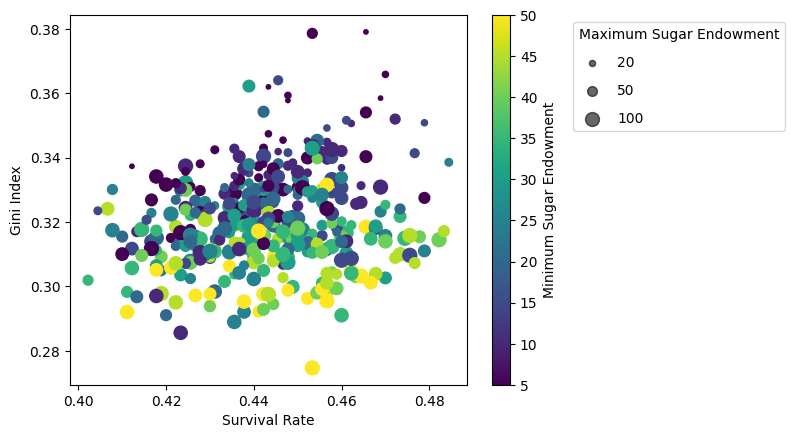

In [13]:
# create plot

scatter = plt.scatter(
    x = s2_endow['survival-rate'],
    y = s2_endow['gini-index'],
    c = s2_endow['minimum-sugar-endowment'],
    s = s2_endow['maximum-sugar-endowment'],
    cmap = 'viridis'
)

plt.xlabel('Survival Rate')
plt.ylabel('Gini Index')

plt.colorbar(scatter, label = 'Minimum Sugar Endowment')

# Create proxy artists for the legend of point sizes
sizes = [20, 50, 100]  # Example sizes
size_labels = ['20', '50', '100']  # Example labels

for size, label in zip(sizes, size_labels):
    plt.scatter([], [], s=size, label=label, color='black', alpha=0.6)

# Show legend
plt.legend(
    scatterpoints=1, labelspacing=1, title='Maximum Sugar Endowment', 
    bbox_to_anchor=(1.25, 1), loc = 'upper left', alignment = 'left'
)

# save
plt.savefig('image/s2_gini_survival.png', bbox_inches = 'tight')


In [14]:
np.random.rand()

0.18267857323397296

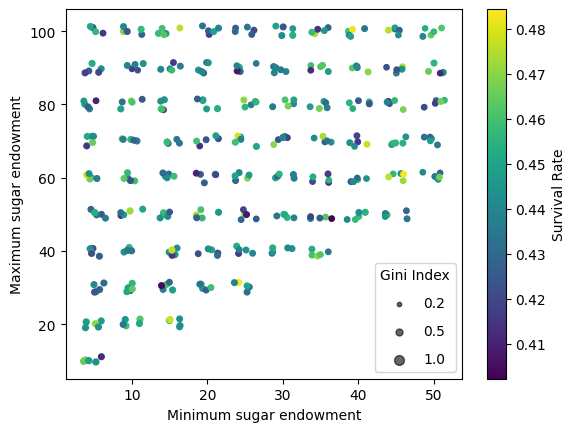

In [15]:
# create plot

scatter = plt.scatter(
    x = s2_endow['minimum-sugar-endowment'] + (np.random.rand(s2_endow.shape[0]) - 0.5) * 3,
    y = s2_endow['maximum-sugar-endowment'] + (np.random.rand(s2_endow.shape[0]) - 0.5) * 3,
    c = s2_endow['survival-rate'],
    s = s2_endow['gini-index'] * 50,
    cmap = 'viridis'
)

plt.xlabel('Minimum sugar endowment')
plt.ylabel('Maximum sugar endowment')

plt.colorbar(scatter, label = 'Survival Rate')

# Create proxy artists for the legend of point sizes
sizes = [10, 25, 50]  # Example sizes
size_labels = ['0.2', '0.5', '1.0']  # Example labels

for size, label in zip(sizes, size_labels):
    plt.scatter([], [], s=size, label=label, color='black', alpha=0.6)

# Show legend
plt.legend(scatterpoints=1, labelspacing=1, title='Gini Index')

plt.show()


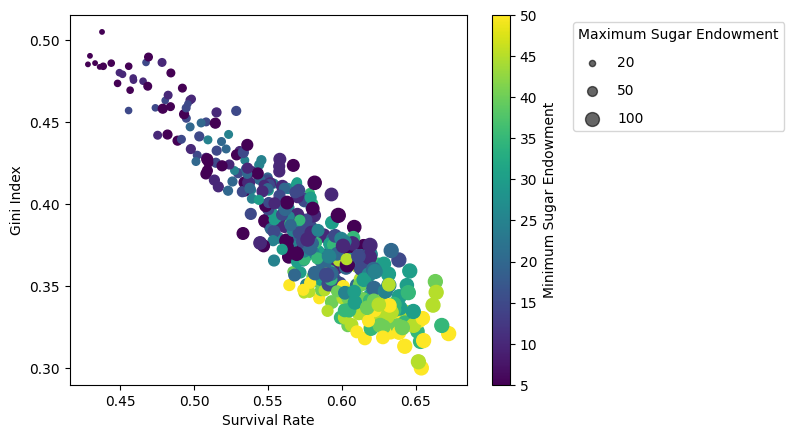

In [16]:
# create plot

scatter = plt.scatter(
    x = s3_endow['survival-rate'],
    y = s3_endow['gini-index'],
    c = s3_endow['minimum-sugar-endowment'],
    s = s3_endow['maximum-sugar-endowment'],
    cmap = 'viridis'
)

plt.xlabel('Survival Rate')
plt.ylabel('Gini Index')

plt.colorbar(scatter, label = 'Minimum Sugar Endowment')

# Create proxy artists for the legend of point sizes
sizes = [20, 50, 100]  # Example sizes
size_labels = ['20', '50', '100']  # Example labels

for size, label in zip(sizes, size_labels):
    plt.scatter([], [], s=size, label=label, color='black', alpha=0.6)

# Show legend
plt.legend(
    scatterpoints=1, labelspacing=1, title='Maximum Sugar Endowment', 
    bbox_to_anchor=(1.25, 1), loc = 'upper left', alignment = 'left'
)

plt.savefig('image/s3_gini_survival.png', bbox_inches = 'tight')


## Comparison of results when considering reproduction

How does the paerformance of the model change if we consider reproduction?

In [17]:
# insert column showing model
s2_mvp_plot.insert(0, column = 'model', value = 'Constant Growback')
s3_mvp_plot.insert(0, column = 'model', value = 'Wealth Distribution')

# combine dataframe
combined_df = pd.concat([s2_mvp_plot, s3_mvp_plot])

In [18]:
combined_df

,model,max-vision,max-metabolism,initial-population,count turtles,survival-rate,gini-index
0,Constant Growback,2,2,200,164,0.820000,0.286893
1,Constant Growback,2,2,400,317,0.792500,0.314200
2,Constant Growback,2,2,500,395,0.790000,0.344369
3,Constant Growback,2,2,600,481,0.801667,0.374955
4,Constant Growback,2,4,100,56,0.560000,0.349497
...,...,...,...,...,...,...,...
1245,Wealth Distribution,10,10,1000,1000,0.116119,0.465765
1246,Wealth Distribution,10,10,1000,1000,0.118166,0.471828
1247,Wealth Distribution,10,10,1000,1000,0.117692,0.468497
1248,Wealth Distribution,10,10,1000,1000,0.115355,0.472637


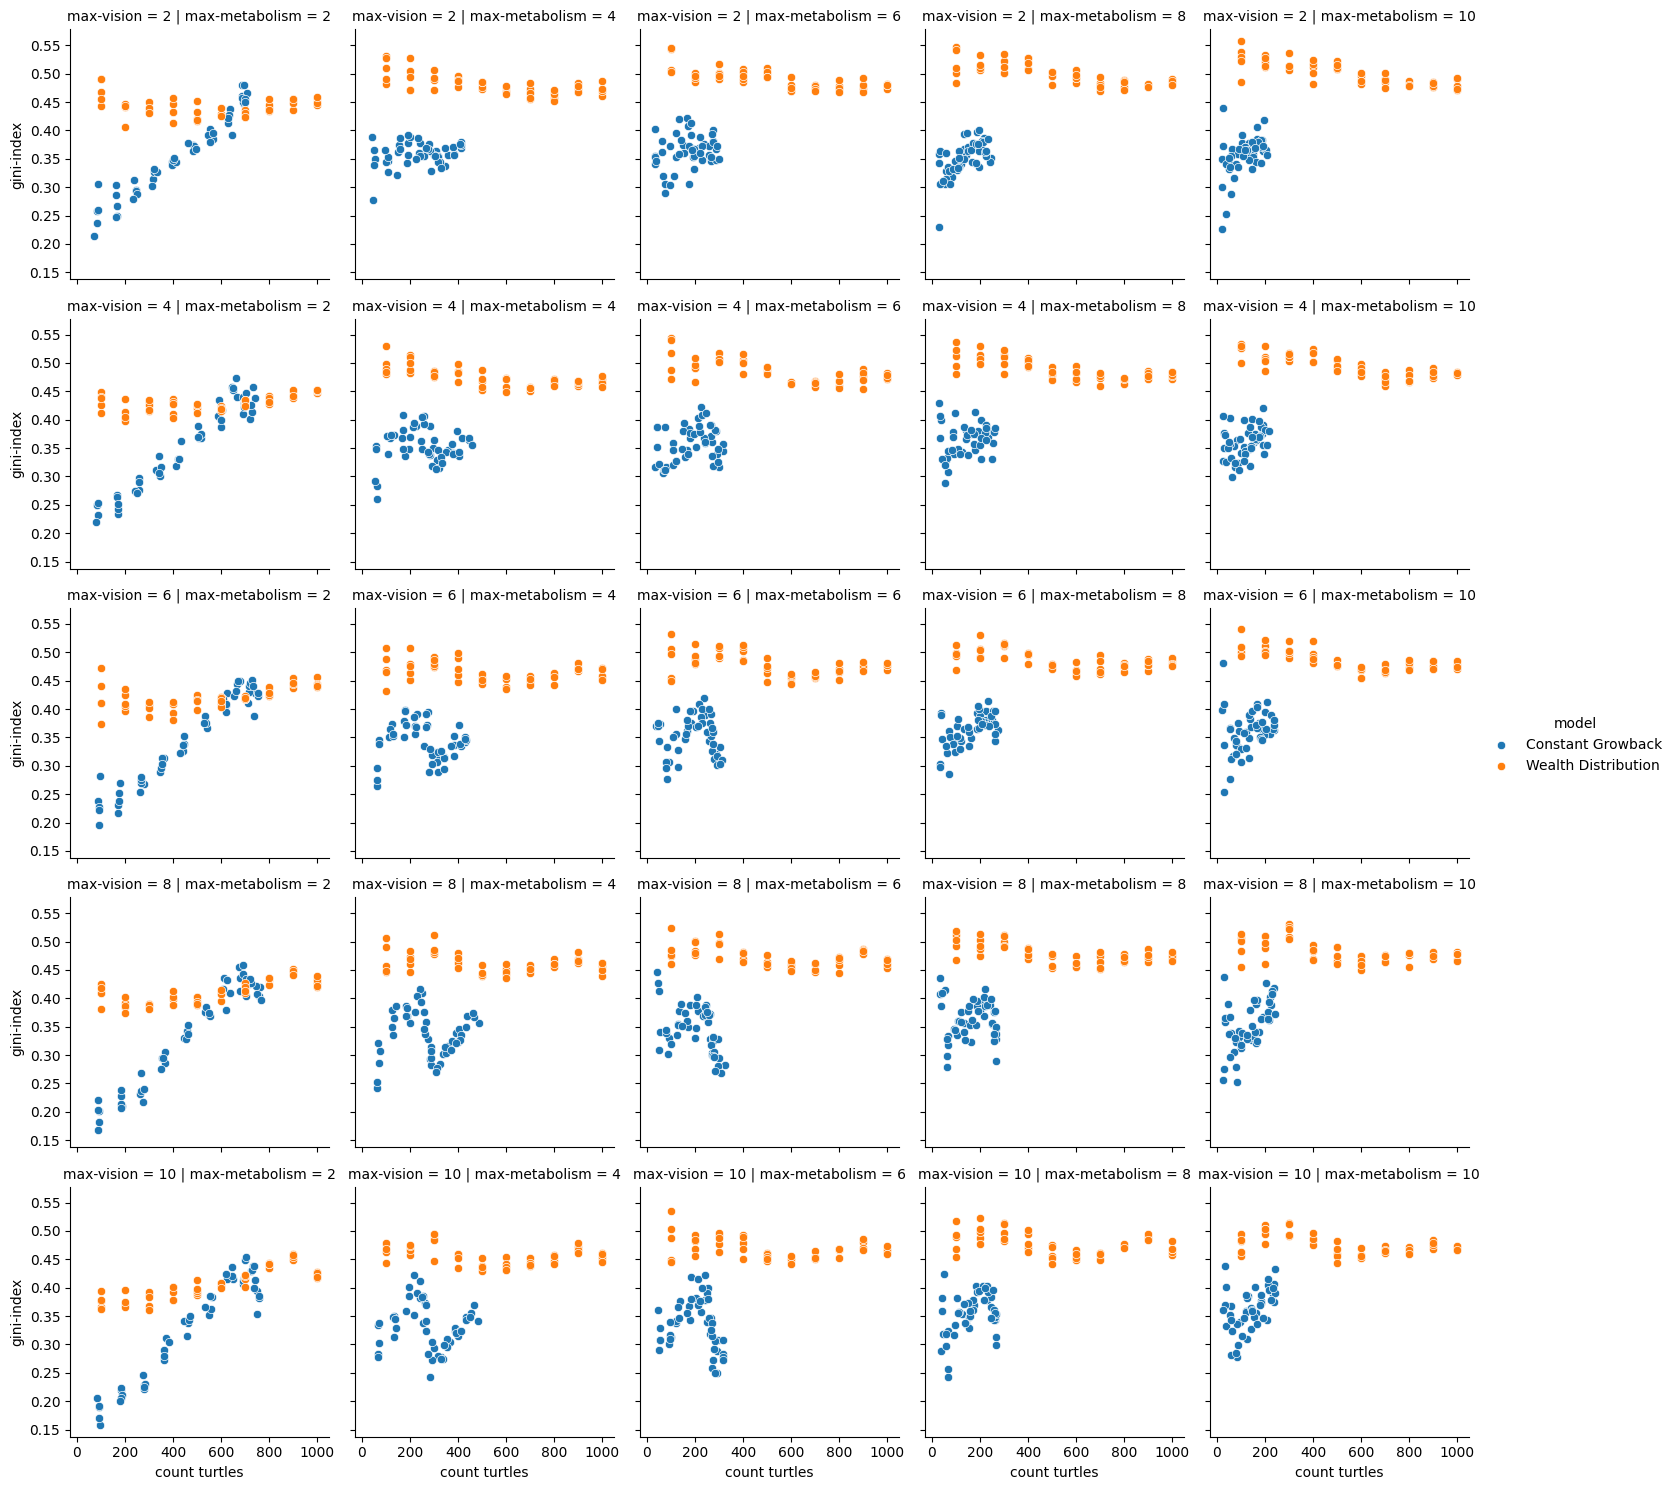

In [19]:
# create gini plot for combined

# init grid
combined_gini_plot = sns.FacetGrid(
    combined_df,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'model'
)

# create scatter plot
combined_gini_plot.map(
    sns.scatterplot,
    'count turtles',
    'gini-index'    
)

# add legend
combined_gini_plot.add_legend()

# save plot
# plt.savefig('image/gini_index_combined.png', bbox_inches = 'tight')


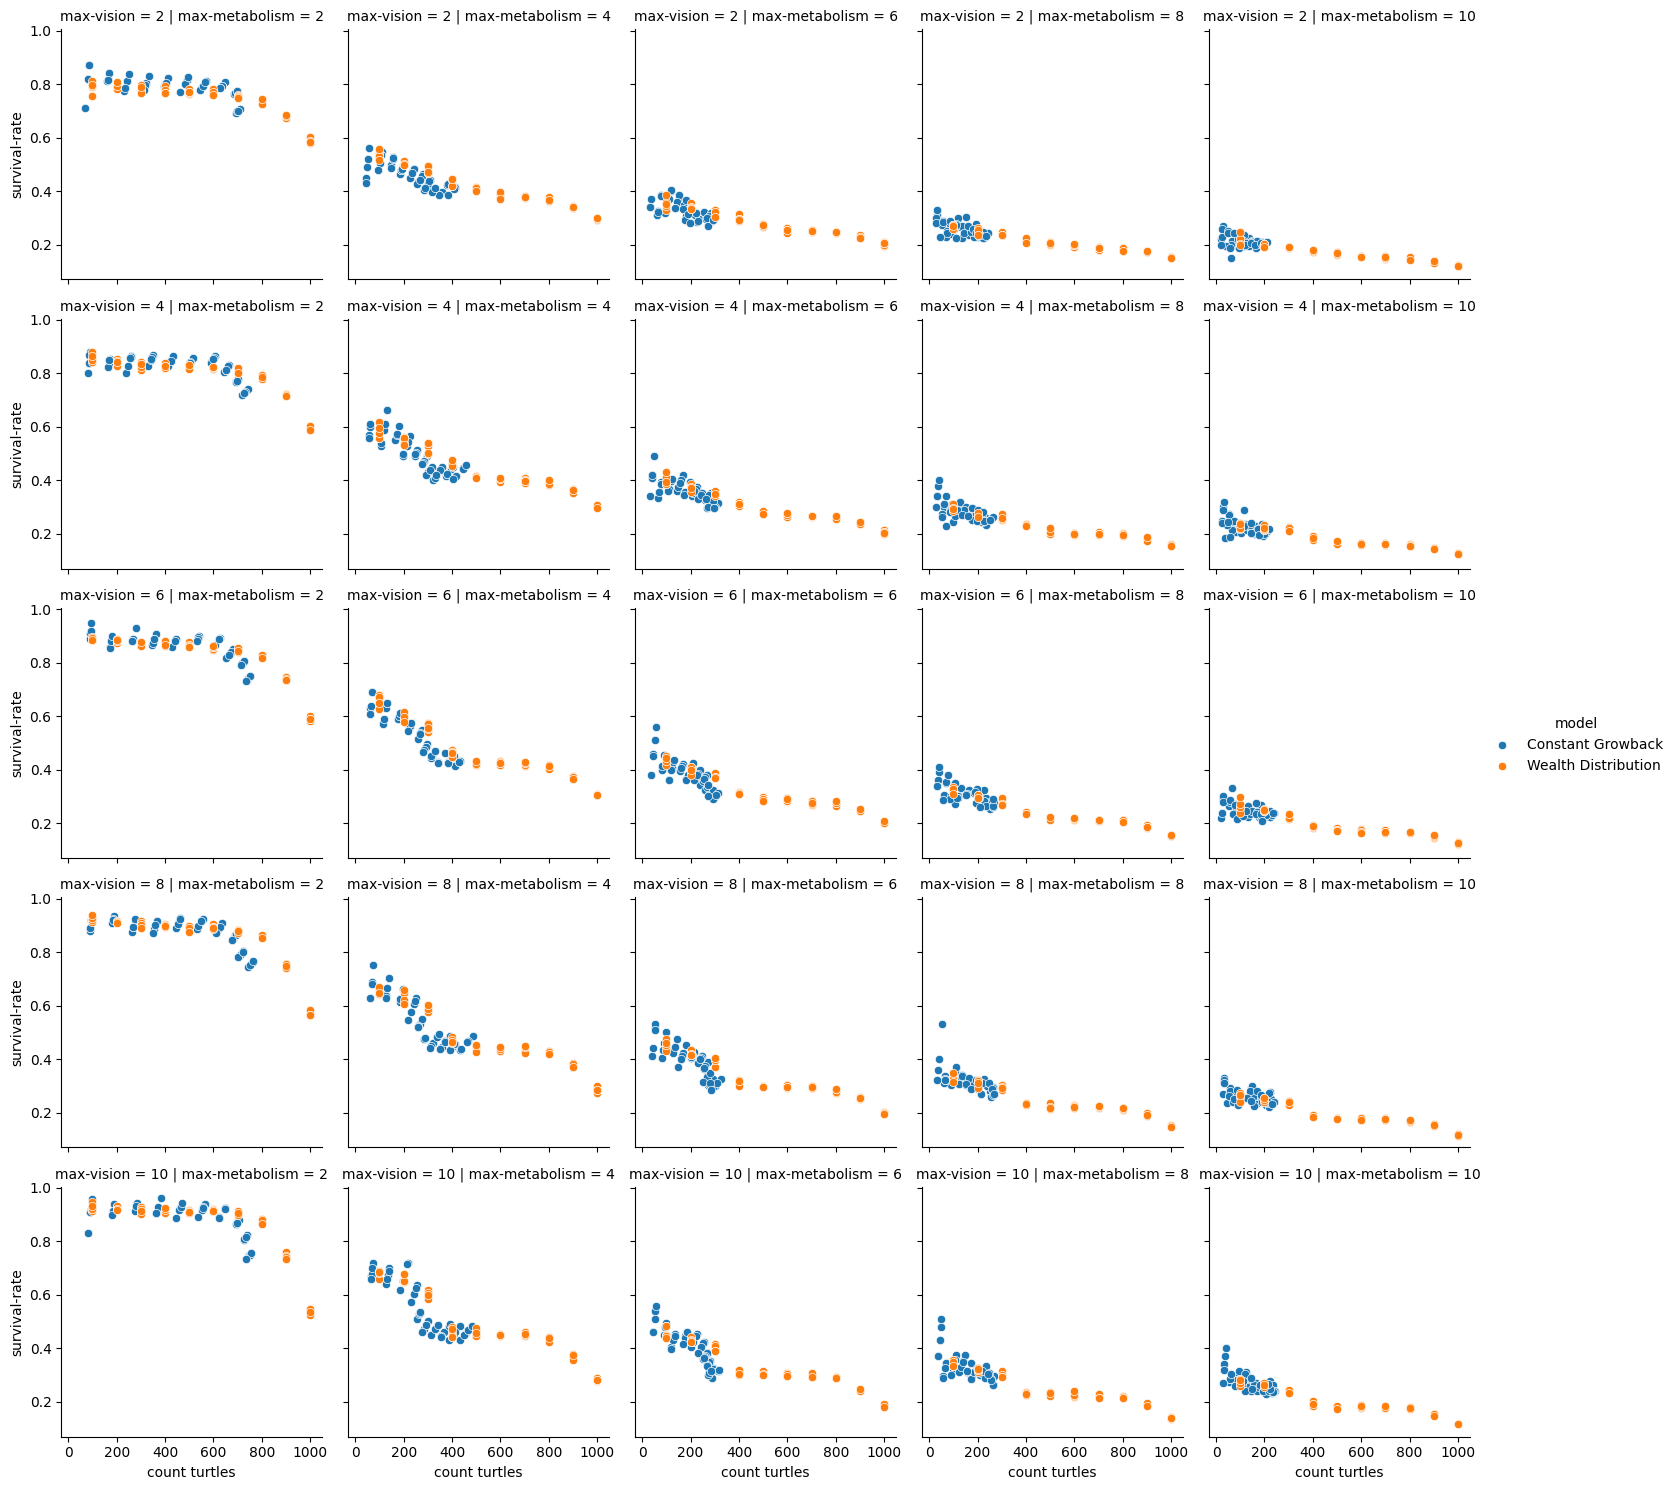

In [20]:
# create survival rate plot for combined

# init grid
combined_survival_plot = sns.FacetGrid(
    combined_df,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'model'
)

# create scatter plot
combined_survival_plot.map(
    sns.scatterplot,
    'count turtles',
    'survival-rate'    
)

# add legend
combined_survival_plot.add_legend()

# save plot
# plt.savefig('image/survival_rate_combined.png', bbox_inches = 'tight')

